In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("petrol_consumption.csv")

In [3]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [6]:
dataset.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [7]:
X = dataset.iloc[:,:-1]
y = dataset.Petrol_Consumption

sc = StandardScaler()
sc.fit_transform(X)

cv = KFold(n_splits=10, random_state=1, shuffle=True)

### Linear Regression

In [8]:
scores_lr = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
mae_lr = np.mean(np.absolute(scores_lr))
rmse_lr = np.sqrt(np.mean(np.absolute(scores_lr)))

print("Linear Regression Results")
print("Mean Absolute Error: ",mae_lr)
print("Root Mean Squared Error:  ",rmse_lr)

Linear Regression Results
Mean Absolute Error:  52.58831640064451
Root Mean Squared Error:   7.251780222858695


### K-Neighbors Regressor

In [9]:
scores_knn = cross_val_score(KNeighborsRegressor(), X, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
mae_knn = np.mean(np.absolute(scores_knn))
rmse_knn = np.sqrt(np.mean(np.absolute(scores_knn)))

print("K-Neighbors Results")
print("Mean Absolute Error: ",mae_knn)
print("Root Mean Squared Error:  ",rmse_knn)

K-Neighbors Results
Mean Absolute Error:  83.92099999999999
Root Mean Squared Error:   9.160840572785883


### Decision Tree Regressor

In [10]:
scores_dtr = cross_val_score(DecisionTreeRegressor(), X, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
mae_dtr = np.mean(np.absolute(scores_dtr))
rmse_dtr = np.sqrt(np.mean(np.absolute(scores_dtr)))

print("Decision Tree Regressor")
print("Mean Absolute Error: ",mae_dtr)
print("Root Mean Squared Error:  ",rmse_dtr)

Decision Tree Regressor
Mean Absolute Error:  74.83
Root Mean Squared Error:   8.650433515148244


### Random Forest Regressor

In [11]:
scores_rfr = cross_val_score(RandomForestRegressor(), X, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
mae_rfr = np.mean(np.absolute(scores_rfr))
rmse_rfr = np.sqrt(np.mean(np.absolute(scores_rfr)))

print("Random Forest Regressor")
print("Mean Absolute Error: ",mae_rfr)
print("Root Mean Squared Error:  ",rmse_rfr)

Random Forest Regressor
Mean Absolute Error:  44.86510000000001
Root Mean Squared Error:   6.698141533291157


### Support Vector Regressor

In [12]:
scores_svr = cross_val_score(SVR(), X, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
mae_svr = np.mean(np.absolute(scores_svr))
rmse_svr = np.sqrt(np.mean(np.absolute(scores_svr)))

print("Support Vector Regressor")
print("Mean Absolute Error: ",mae_svr)
print("Root Mean Squared Error:  ",rmse_svr)

Support Vector Regressor
Mean Absolute Error:  80.26898418566797
Root Mean Squared Error:   8.959295964843887


### Visualization

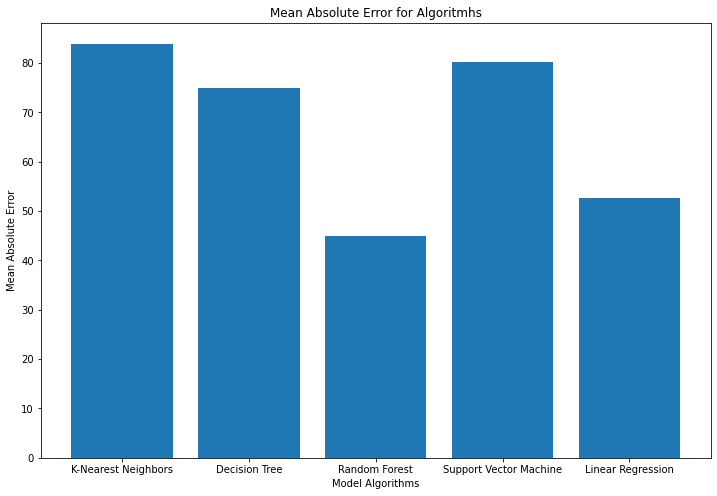

In [13]:
plt.figure(figsize=(12,8))
D = {u'K-Nearest Neighbors':mae_knn, u'Decision Tree': mae_dtr, u'Random Forest':mae_rfr, u'Support Vector Machine':mae_svr,u'Linear Regression':mae_lr}

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel("Model Algorithms")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error for Algoritmhs")
plt.show()

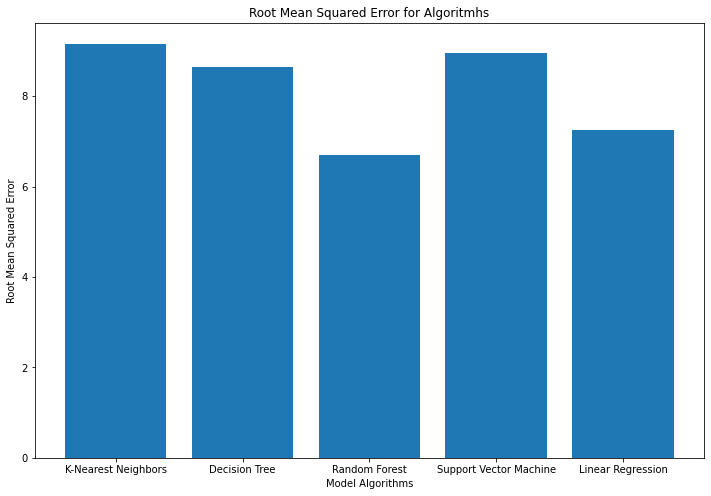

In [14]:
plt.figure(figsize=(12,8))
D = {u'K-Nearest Neighbors':rmse_knn, u'Decision Tree': rmse_dtr, u'Random Forest':rmse_rfr, u'Support Vector Machine':rmse_svr,u'Linear Regression':rmse_lr}

plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xlabel("Model Algorithms")
plt.ylabel("Root Mean Squared Error")
plt.title("Root Mean Squared Error for Algoritmhs")
plt.show()